# The goal of this project is to find a set of features that affect the Life Expectancy

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings


# Dataset:

This dataset is comprised of data from all over the world from various countries aggregated by the World Health Organization. The data is an aggregate of many indicators for a particular country in a particular year. In essence, the data is multiple indicators in a time series separated by country.

Variable Descriptions

country (Nominal) - the country in which the indicators are from 

year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)

status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards

life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year

adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); 

infant_deaths (Ratio) - number of infant deaths per 1000 population; 

alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita

percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)

hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population

measles (Ratio) - number of reported Measles cases per 1000 population

bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population

under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population

polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population

total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure

diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds

hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; 

gdp (Ratio) - Gross Domestic Product per capita

population (Ratio) - population of a country

thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 

thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9

income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

schooling (Ratio) - average number of years of schooling of a population

# Reading data into Jupyter notebook and importing it to a data frame

In [2]:
data = pd.read_csv('/Users/ashok/Documents/Spring 2020/Machine Learning/Project/Life Expectancy Data.csv')

# Exploring Data

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
print("This dataset contains " + str(data.shape[0]) + " rows and " + str(data.shape[1]) + " columns/features.")
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

This dataset contains 2938 rows and 22 columns/features.

Features : 
 ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Missing values :   2563

Unique values :  
 Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total ex

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

# Data Cleaning and Preperation

In [7]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [8]:
data.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [9]:
data['life_expectancy'].unique()

array([65. , 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57.5, 57.3, 57. , 56.7,
       56.2, 55.3, 54.8, 77.8, 77.5, 77.2, 76.9, 76.6, 76.2, 76.1, 75.3,
       75.9, 74.2, 73.5, 73. , 72.8, 73.3, 73.6, 72.6, 75.6, 75.4, 75.1,
       74.9, 74.7, 74.4, 74.1, 73.8, 73.4, 72.9, 72.3, 71.7, 71.6, 71.4,
       71.3, 52.4, 51.7, 51.1, 56. , 51. , 49.6, 49.1, 48.7, 48.2, 47.7,
       47.4, 47.1, 46.8, 46.5, 45.7, 45.3, 76.4, 75.7, 75.2, 75. , 74.8,
       74.6, 74. , 76.3, 76. , 75.5, 73.9, 73.2, 72.7, 72. , 82.8, 82.7,
       82.5, 82.3, 82. , 81.9, 81.7, 81.3, 81.2, 81. , 86. , 83. , 79.9,
       79.5, 81.5, 81.4, 81.1, 88. , 84. , 79.8, 79.4, 79.3, 78.8, 78.7,
       78.6, 78.1, 72.5, 72.2, 71.9, 71.1, 78. , 69.2, 68.4, 67.8, 67.5,
       66.6, 74.5, 73.1, 76.8, 76.7, 76.5, 75.8, 71.8, 71. , 77. , 69.9,
       69.5, 69.1, 68.6, 68.2, 67.3, 66.8, 66.3, 65.8, 65.3, 73.7, 70. ,
       69.8, 68.9, 68.1, 67.7, 67.2, 68. , 89. , 87. , 80. , 78.9, 78.3,
       77.6, 69.4, 69.6, 69. , 68.7, 68.5, 68.3, 60

# Checking for missing values

In [10]:
data.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [11]:
def nulls_breakdown(data=data):
    df_cols = list(data.columns)
    cols_total_count = len(list(data.columns))
    cols_count = 0
    for loc, col in enumerate(df_cols):
        null_count = data[col].isnull().sum()
        total_count = data[col].isnull().count()
        percent_null = round(null_count/total_count*100, 2)
        if null_count > 0:
            cols_count += 1
            print('[iloc = {}] {} has {} null values: {}% null'.format(loc, col, null_count, percent_null))
    cols_percent_null = round(cols_count/cols_total_count*100, 2)
    print('Out of {} total columns, {} contain null values; {}% columns contain null values.'.format(cols_total_count, cols_count, cols_percent_null))

In [12]:
nulls_breakdown()

[iloc = 3] life_expectancy has 10 null values: 0.34% null
[iloc = 4] adult_mortality has 10 null values: 0.34% null
[iloc = 6] alcohol has 194 null values: 6.6% null
[iloc = 8] hepatitis_b has 553 null values: 18.82% null
[iloc = 10] bmi has 34 null values: 1.16% null
[iloc = 12] polio has 19 null values: 0.65% null
[iloc = 13] total_expenditure has 226 null values: 7.69% null
[iloc = 14] diphtheria has 19 null values: 0.65% null
[iloc = 16] gdp has 448 null values: 15.25% null
[iloc = 17] population has 652 null values: 22.19% null
[iloc = 18] thinness__1-19_years has 34 null values: 1.16% null
[iloc = 19] thinness_5-9_years has 34 null values: 1.16% null
[iloc = 20] income_composition_of_resources has 167 null values: 5.68% null
[iloc = 21] schooling has 163 null values: 5.55% null
Out of 22 total columns, 14 contain null values; 63.64% columns contain null values.


# Filling in missing data

Since this is time series data assorted by country, the best course of action would be to interpolate the data by country. However, when attempting to interpolate by country it doesn't fill in any values as the countries' data for all the null values are null for each year, therefore imputation by year may be the best possible method here. Imputation of each year's mean is done below.

In [13]:
imputed_data = []
for year in list(data.year.unique()):
    year_data = data[data.year == year].copy()
    for col in list(year_data.columns)[3:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    imputed_data.append(year_data)
data = pd.concat(imputed_data).copy()

In [14]:
nulls_breakdown(data)

Out of 22 total columns, 0 contain null values; 0.0% columns contain null values.


# Visualizing Data

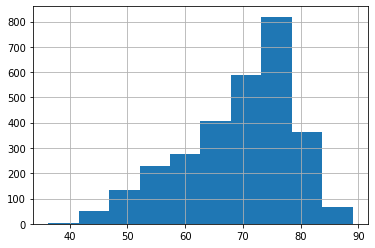

In [15]:
data['life_expectancy'].hist()

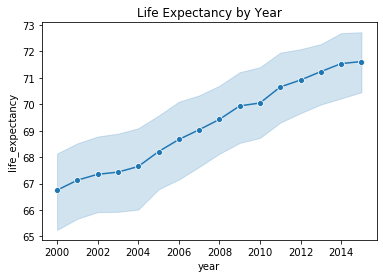

In [16]:
sns.lineplot('year', 'life_expectancy', data=data, marker='o')
plt.title('Life Expectancy by Year')
plt.show()

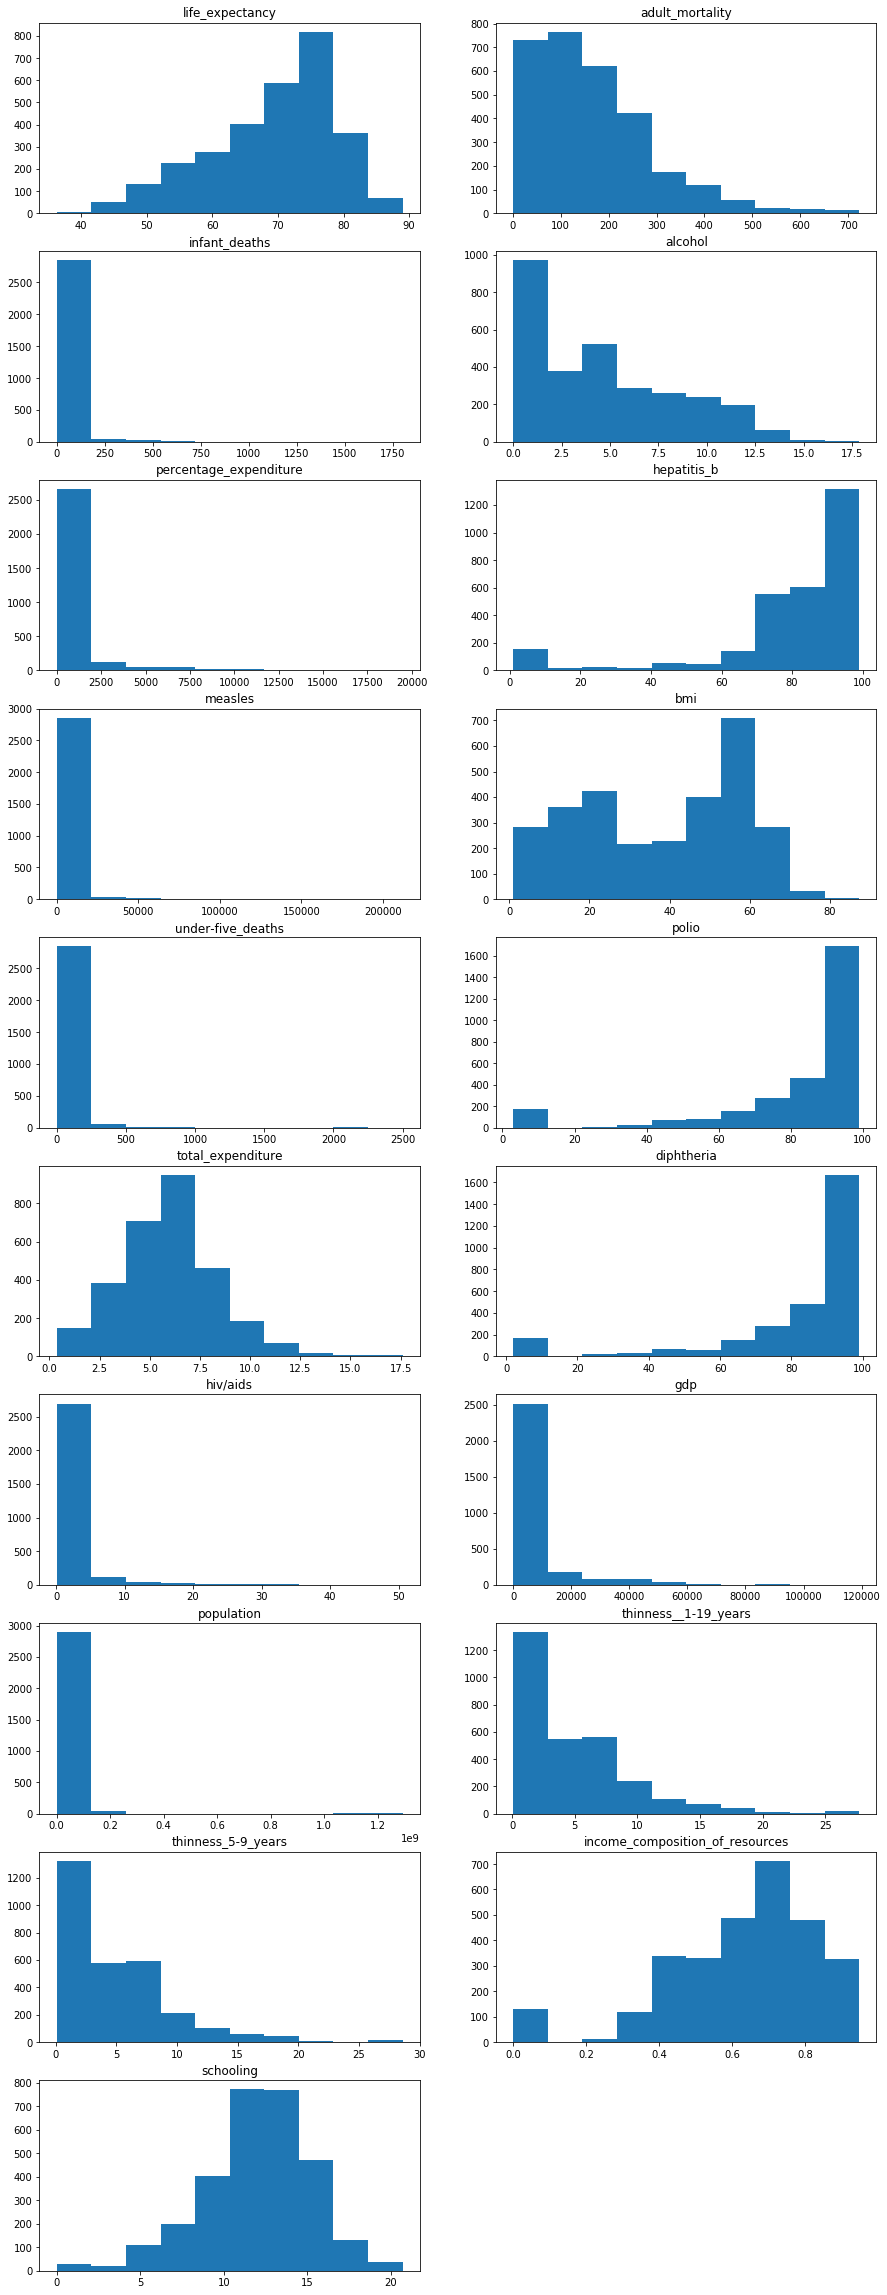

In [17]:
col =['life_expectancy', 'adult_mortality','infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b','measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure','diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling']
plt.figure(figsize=(15,75))

for i in range(len(col)):
    plt.subplot(18,2,i+1)
    plt.hist(data[col[i]])
    plt.title(col[i])

plt.show()

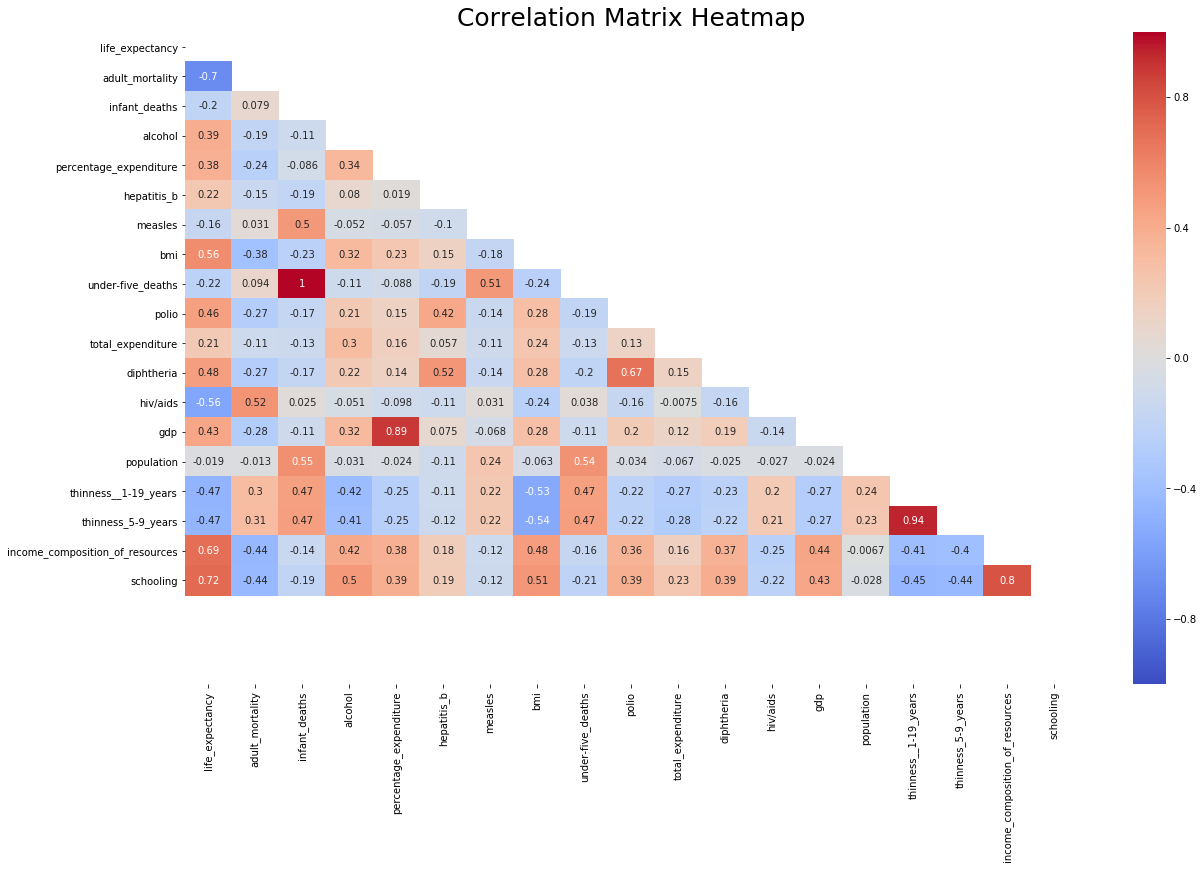

In [18]:
mask = np.triu(data[col].corr())
plt.figure(figsize=(20,12))
sns.heatmap(data[col].corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
plt.ylim(len(data.columns), 0)
plt.title('Correlation Matrix Heatmap', fontsize =25)
plt.show()

Some observations from the correlation matrix:

Life Expectancy appears to be relatively highly correlated with Adult Mortality (negative), HIV/AIDS (negative), Income Composition of Resources (positive), Schooling (positive).

Life expectancy is extremely lowly correlated to population.

Infant deaths and Under Five deaths are extremely highly correlated.

Percentage Expenditure and GDP are relatively highly correlated.

Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates.

Polio vaccine rate and Diphtheria vaccine rate are very positively correlated.

HIV/AIDS is relatively negatively correlated with Income Composition of Resources.

Income Composition of Resources and Schooling are very highly correlated.

In [19]:
target = data.life_expectancy.values

features = data.drop(['life_expectancy','country', 'year', 'status'],axis=1)
features_encoded = pd.get_dummies(features)

Since country, year and status features does not contribute to determining the life expectancy, we will be dropping these values from our feature set.

# Train Test Split of Data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2,random_state =1)

# Used min max scaler as for regression values should be comparable. We scale numeric values in range of 0 to 1

In [21]:
scaler = MinMaxScaler()

# Scale variables

In [22]:
x_train_scaled  = scaler.fit_transform(x_train)
x_test_scaled  = scaler.fit_transform(x_test)

# All scores and classifiers

In [23]:
classifier = []
mean_cv_train_score = []
mean_cv_test_score = []
train_score = []
test_score = []
mae_score_test = []
best_cv_score = []

# Regressor 1 : KNN . We also do a grid search for best k

In [24]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors':[4]}
clf = GridSearchCV(knn, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

# Average Cross Validation Test score


In [25]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.897318977620683


# Average Cross Validation Train score


In [26]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.940286016296246


# Best Cross Validation Score

In [27]:
score6 = float(format(clf.best_score_))
print(score6)

0.897318977620683


# Training score 

In [28]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.9446508619256743


# Test Score

In [29]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.8995154416775366


In [30]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

# Mean absolute error : Train

In [31]:
mean_absolute_error(y_train, preds_train)

1.4614595395884202

# Mean absolute error : Test

In [32]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

1.9822941061670567


# Best Estimator from grid search was 4 neighbors

In [33]:
clf.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

Text(0, 0.5, 'Training Error Plot')

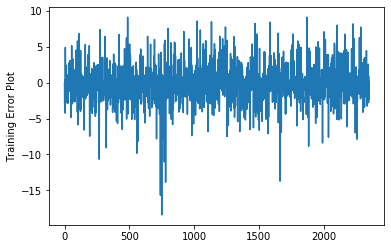

In [34]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

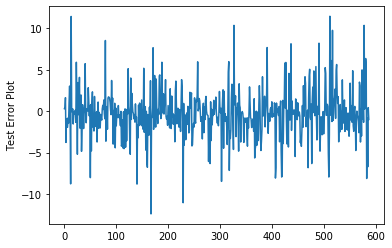

In [35]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [36]:
classifier.append('KNN')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Regressor 2: Multiple Linear Regression

In [37]:
reg = LinearRegression()
parameters = {}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

# Avergage Cross Validation Test score

In [38]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.8129770103585414


# Avergage Cross Validation Train score

In [39]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.8191567192534231


# Best Cross Validation Score

In [40]:
score6 = float(format(clf.best_score_))
print(score6)

0.8129770103585414


# Training score

In [41]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.8186766147498776


# Test Score

In [42]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.7992480864582644


In [43]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

# Mean absolute error : Train

In [44]:
mean_absolute_error(y_train, preds_train)

3.028116061977683

# Mean absolute error : Test

In [45]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

3.031555635486566


Text(0, 0.5, 'Training Error Plot')

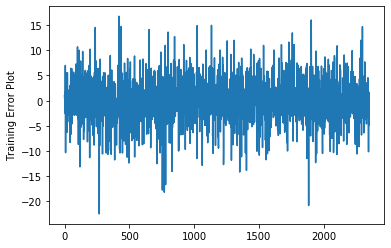

In [46]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

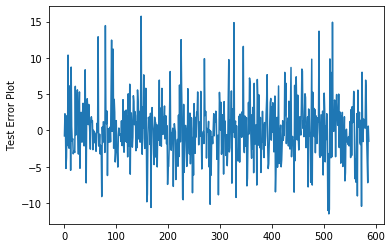

In [47]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [48]:
classifier.append('Linear Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Regressor 3 : Ridge Regression

In [49]:
reg = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 20, 50, 100, 200, 500]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 20, 50, 100, 200, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

# Average Cross Validation Test score

In [50]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.721725901476598


# Avergage Cross Validation Train score

In [51]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.7254222024666102


# Best Cross Validation Score

In [52]:
score6 = float(format(clf.best_score_))
print(score6)

0.8122846973042932


# Training score

In [53]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.8179992100497961


# Test Score

In [54]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.8042998537192337


In [55]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

# Mean absolute error : Train

In [56]:
mean_absolute_error(y_train, preds_train)

3.032154794101416

# Mean absolute error : Test

In [57]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

3.009897380126663


Text(0, 0.5, 'Training Error Plot')

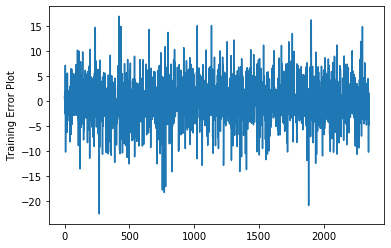

In [58]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

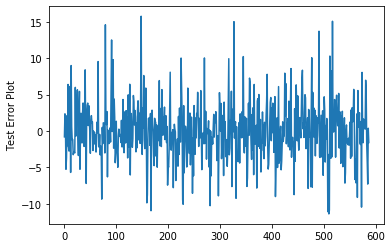

In [59]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [60]:
classifier.append('Ridge Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Regressor 4 : Lasso

In [61]:
reg = linear_model.Lasso()
parameters = {'alpha': [0.01, 0.1, 1, 10]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

# Average Cross Validation Test score

In [62]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.4620189409319824


# Average Cross Validation Train score

In [63]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.4651653906741965


# Best Cross Validation Score

In [64]:
score6 = float(format(clf.best_score_))
print(score6)

0.8045223348506478


# Training score 


In [65]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.809576406221416


# Test Score

In [66]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.7990290610658437


In [67]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

# Mean absolute error : Train

In [68]:
mean_absolute_error(y_train, preds_train)

3.095322972306613

# Mean absolute error : Test

In [69]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

3.042769692098295


Text(0, 0.5, 'Training Error Plot')

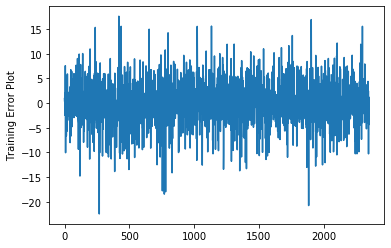

In [70]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

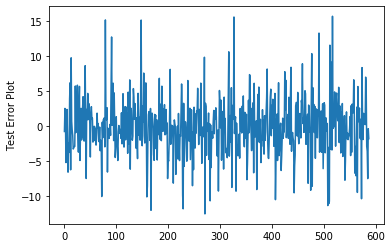

In [71]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [72]:
classifier.append('Lasso Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Regressor 5 : Polynomial

In [73]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(x_train_scaled)
reg2 = linear_model.LinearRegression()
parameters = {}
clf = GridSearchCV(reg2, parameters, cv=5, return_train_score=True)
clf.fit(X_, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

# Average Cross Validation Test score

In [74]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.766420081771502


# Average Cross Validation Train score

In [75]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.9287636807218984


# Best Cross Validation score

In [76]:
score6 = float(format(clf.best_score_))
print(score6)

0.766420081771502


# Training score

In [77]:
score3 = clf.score(poly.transform(x_train_scaled), y_train)
print(score3)

0.9258181217029642


# Test Score

In [78]:
score4 = clf.score(poly.transform(x_test_scaled), y_test)
print(score4)

0.8701267436026515


In [79]:
preds_test = clf.predict(poly.transform(x_test_scaled))
preds_train = clf.predict(poly.transform(x_train_scaled))

# Mean absolute error : Train

In [80]:
mean_absolute_error(y_train, preds_train)

1.909333855804281

# Mean absolute error : Test

In [81]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

2.158953488684954


Text(0, 0.5, 'Training Error Plot')

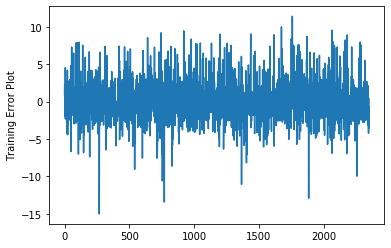

In [82]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

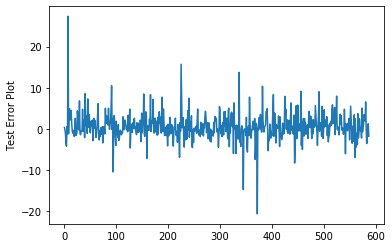

In [83]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [84]:
classifier.append('Polynomial Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Regressor 6 : SVM Linear

In [85]:
reg = SVR(kernel='linear')
parameters = {'gamma': [0.5,1.0,0.1]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.5, 1.0, 0.1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

# Average Cross Validation Test score

In [86]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.7876068887611517


# Average Cross Validation Train score

In [87]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.7936626667316823


# Best Cross Validation score

In [88]:
score6 = float(format(clf.best_score_))
print(score6)

0.7876068887611517


# Training score

In [89]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.7943508903056524


# Test Score

In [90]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.785591335195696


In [91]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

# Mean absolute error : Train

In [92]:
mean_absolute_error(y_train, preds_train)

3.0729736664339224

# Mean absolute error : Test

In [93]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

3.0475037792043373


Text(0, 0.5, 'Training Error Plot')

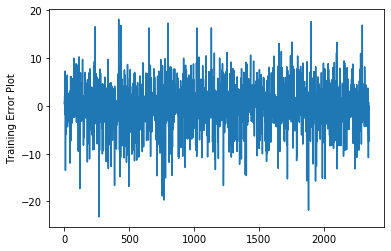

In [94]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

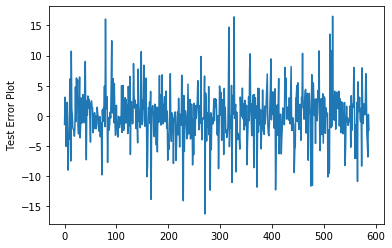

In [95]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [96]:
classifier.append('SVM Linear Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Regressor 7 : SVM polynomial kernel

In [97]:
reg = SVR(kernel = 'poly',C=100, gamma='auto')
parameters = {}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None, param_grid={},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

# Average Cross Validation Test score

In [98]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.7614425315565085


# Average Cross Validation Train score

In [99]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.7677923220632019


# Best Cross Validation score

In [100]:
score6 = float(format(clf.best_score_))
print(score6)

0.7614425315565085


In [101]:
float(score6)

0.7614425315565085

# Training score

In [102]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.7726188791325364


# Test Score

In [103]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.7730918270368692


In [104]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

# Mean absolute error : Train

In [105]:
mean_absolute_error(y_train, preds_train)

3.2902135786107056

# Mean absolute error : Test

In [106]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

3.1725567469210723


Text(0, 0.5, 'Training Error Plot')

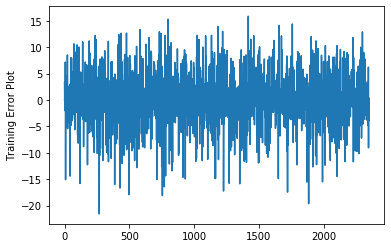

In [107]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

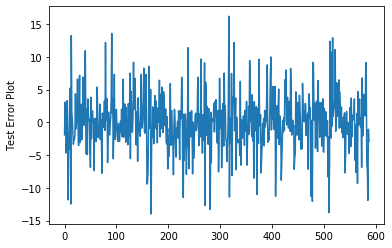

In [108]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [109]:
classifier.append('SVM Poly Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Regressor 8 : SVM RBF kernel

In [110]:
reg = SVR(kernel = 'rbf',C=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

# Average Cross Validation Test score

In [111]:
score1 = np.mean(clf.cv_results_['mean_test_score'])
print(score1)

0.34162589259356513


# Average Cross Validation Train score

In [112]:
score2 = np.mean(clf.cv_results_['mean_train_score'])
print(score2)

0.3879799638831421


# Best Cross Validation score

In [113]:
score6 = float(format(clf.best_score_))
print(score6)

0.9288440261741538


# Training score

In [114]:
score3 = clf.score(x_train_scaled, y_train)
print(score3)

0.9555247449912332


# Test Score

In [115]:
score4 = clf.score(x_test_scaled, y_test)
print(score4)

0.9319331618402412


In [116]:
preds_test = clf.predict(x_test_scaled)
preds_train = clf.predict(x_train_scaled)

# Mean absolute error : Train

In [117]:
mean_absolute_error(y_train, preds_train)

1.1297192347002565

# Mean absolute error : Test

In [118]:
score5 = mean_absolute_error(y_test, preds_test)
print(score5)

1.6728444181123518


Text(0, 0.5, 'Training Error Plot')

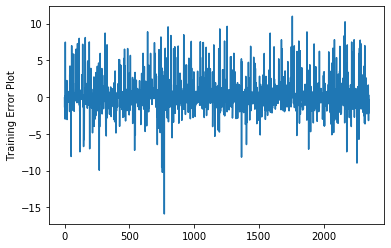

In [119]:
plt.plot(y_train-preds_train)
plt.ylabel('Training Error Plot')

Text(0, 0.5, 'Test Error Plot')

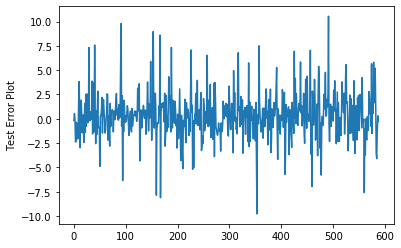

In [120]:
plt.plot(y_test-preds_test)
plt.ylabel('Test Error Plot')

In [121]:
classifier.append('SVM RBF Regression')
mean_cv_test_score.append(score1)
mean_cv_train_score.append(score2)
train_score.append(score3)
test_score.append(score4)
mae_score_test.append(score5)
best_cv_score.append(score6)

# Model Comparision

Text(0.5, 1.0, 'Model Comparision : Average CV Test Score')

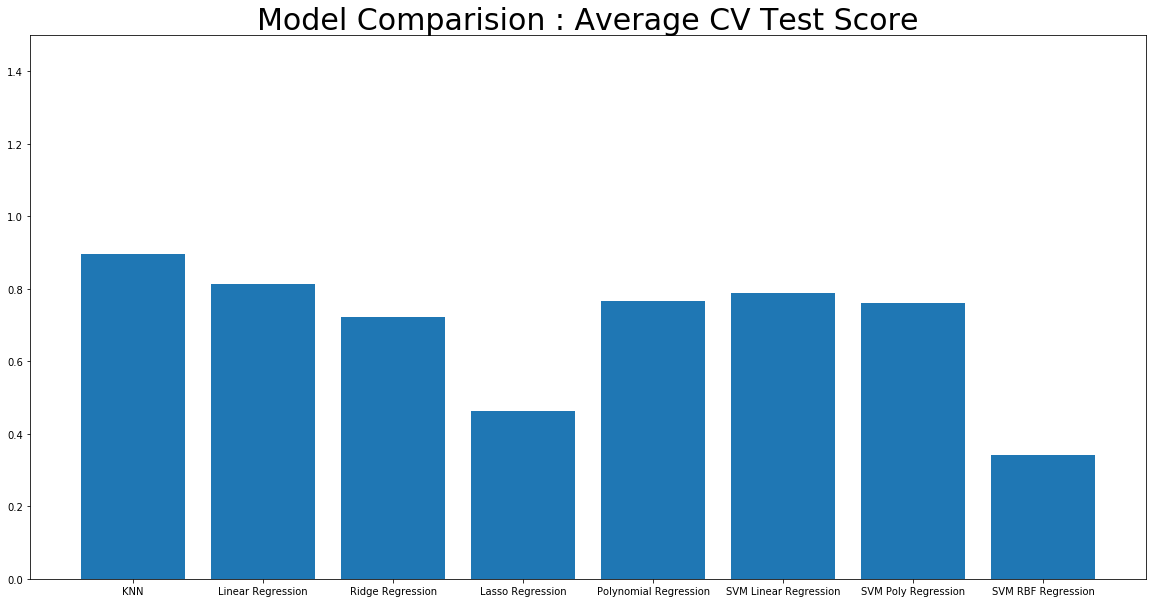

In [122]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.ylim(0, 1.5)
plt.bar(classifier, mean_cv_test_score)
plt.title('Model Comparision : Average CV Test Score', fontsize =30)

In [123]:
mean_cv_train_score

[0.940286016296246,
 0.8191567192534231,
 0.7254222024666102,
 0.4651653906741965,
 0.9287636807218984,
 0.7936626667316823,
 0.7677923220632019,
 0.3879799638831421]

Text(0.5, 1.0, 'Model Comparision : Average CV Train Score')

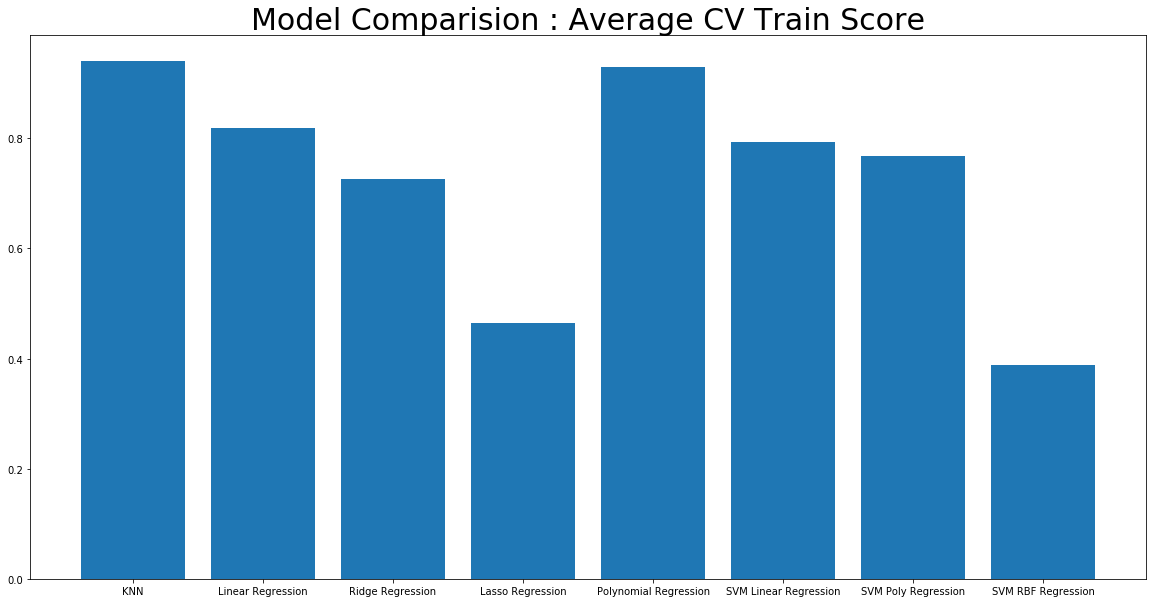

In [124]:
plt.figure(figsize=(20,10))

plt.bar(classifier, mean_cv_train_score)
plt.title('Model Comparision : Average CV Train Score', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Best CV Score')

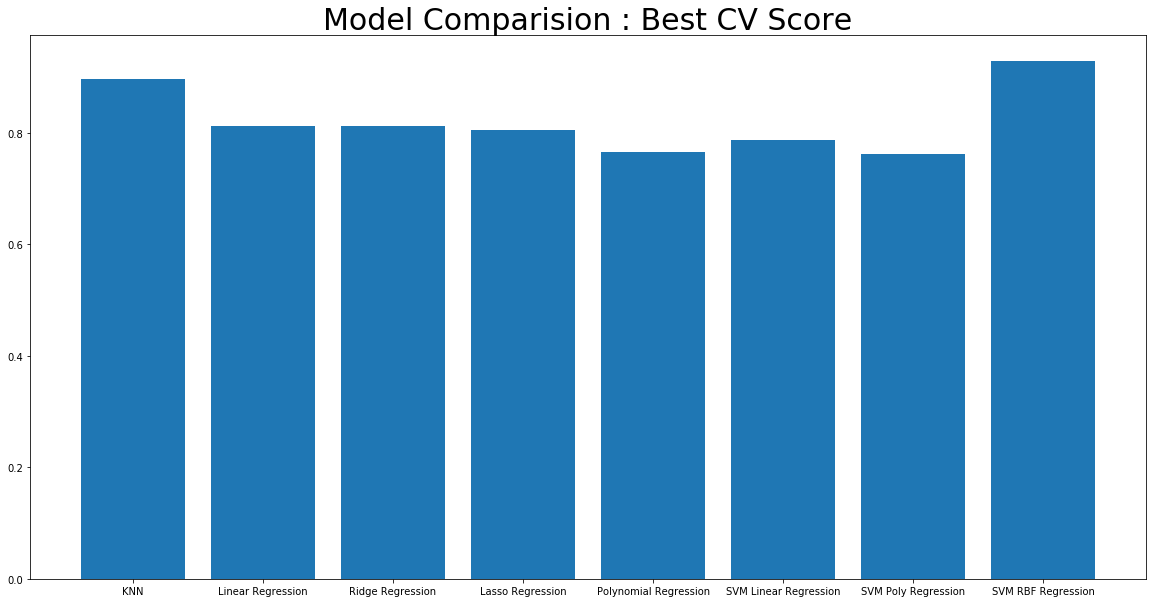

In [125]:
plt.figure(figsize=(20,10))
plt.bar(classifier, best_cv_score)
plt.title('Model Comparision : Best CV Score', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Mean Absolute Error Test')

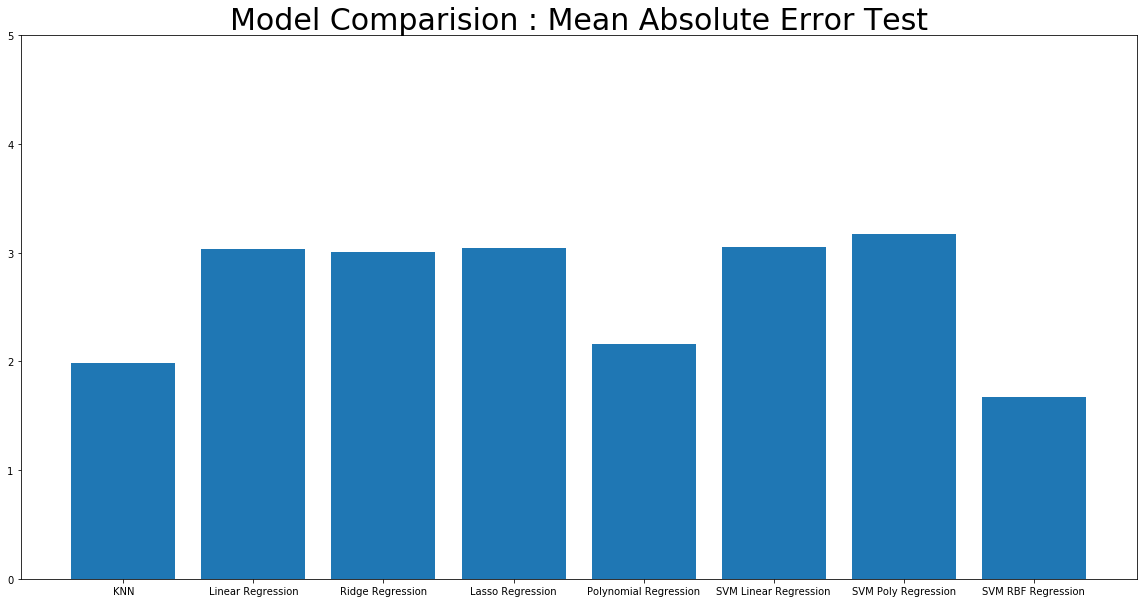

In [126]:
plt.figure(figsize=(20,10))
plt.ylim(0, 5)
plt.bar(classifier, mae_score_test)
plt.title('Model Comparision : Mean Absolute Error Test', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Train Score')

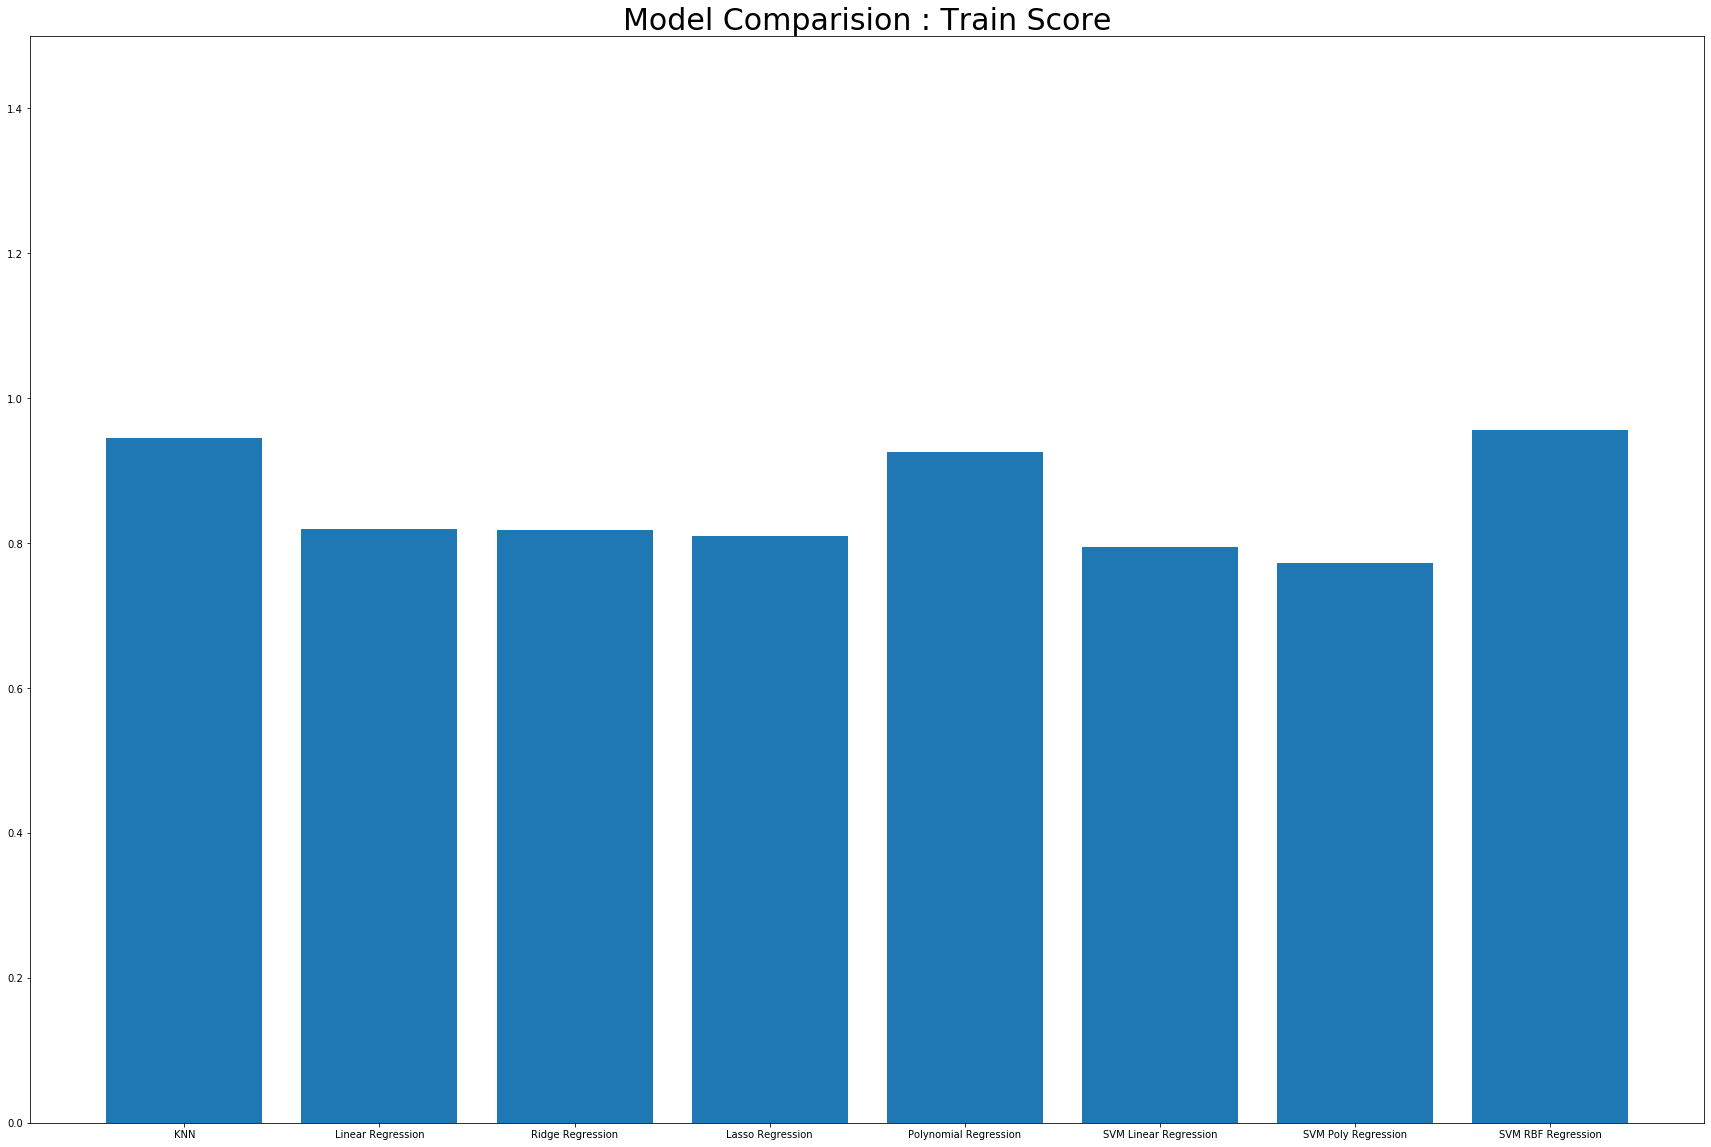

In [127]:
plt.figure(figsize=(30,20))
plt.ylim(0, 1.5)
plt.bar(classifier, train_score)
plt.title('Model Comparision : Train Score', fontsize =30)

Text(0.5, 1.0, 'Model Comparision : Test Score')

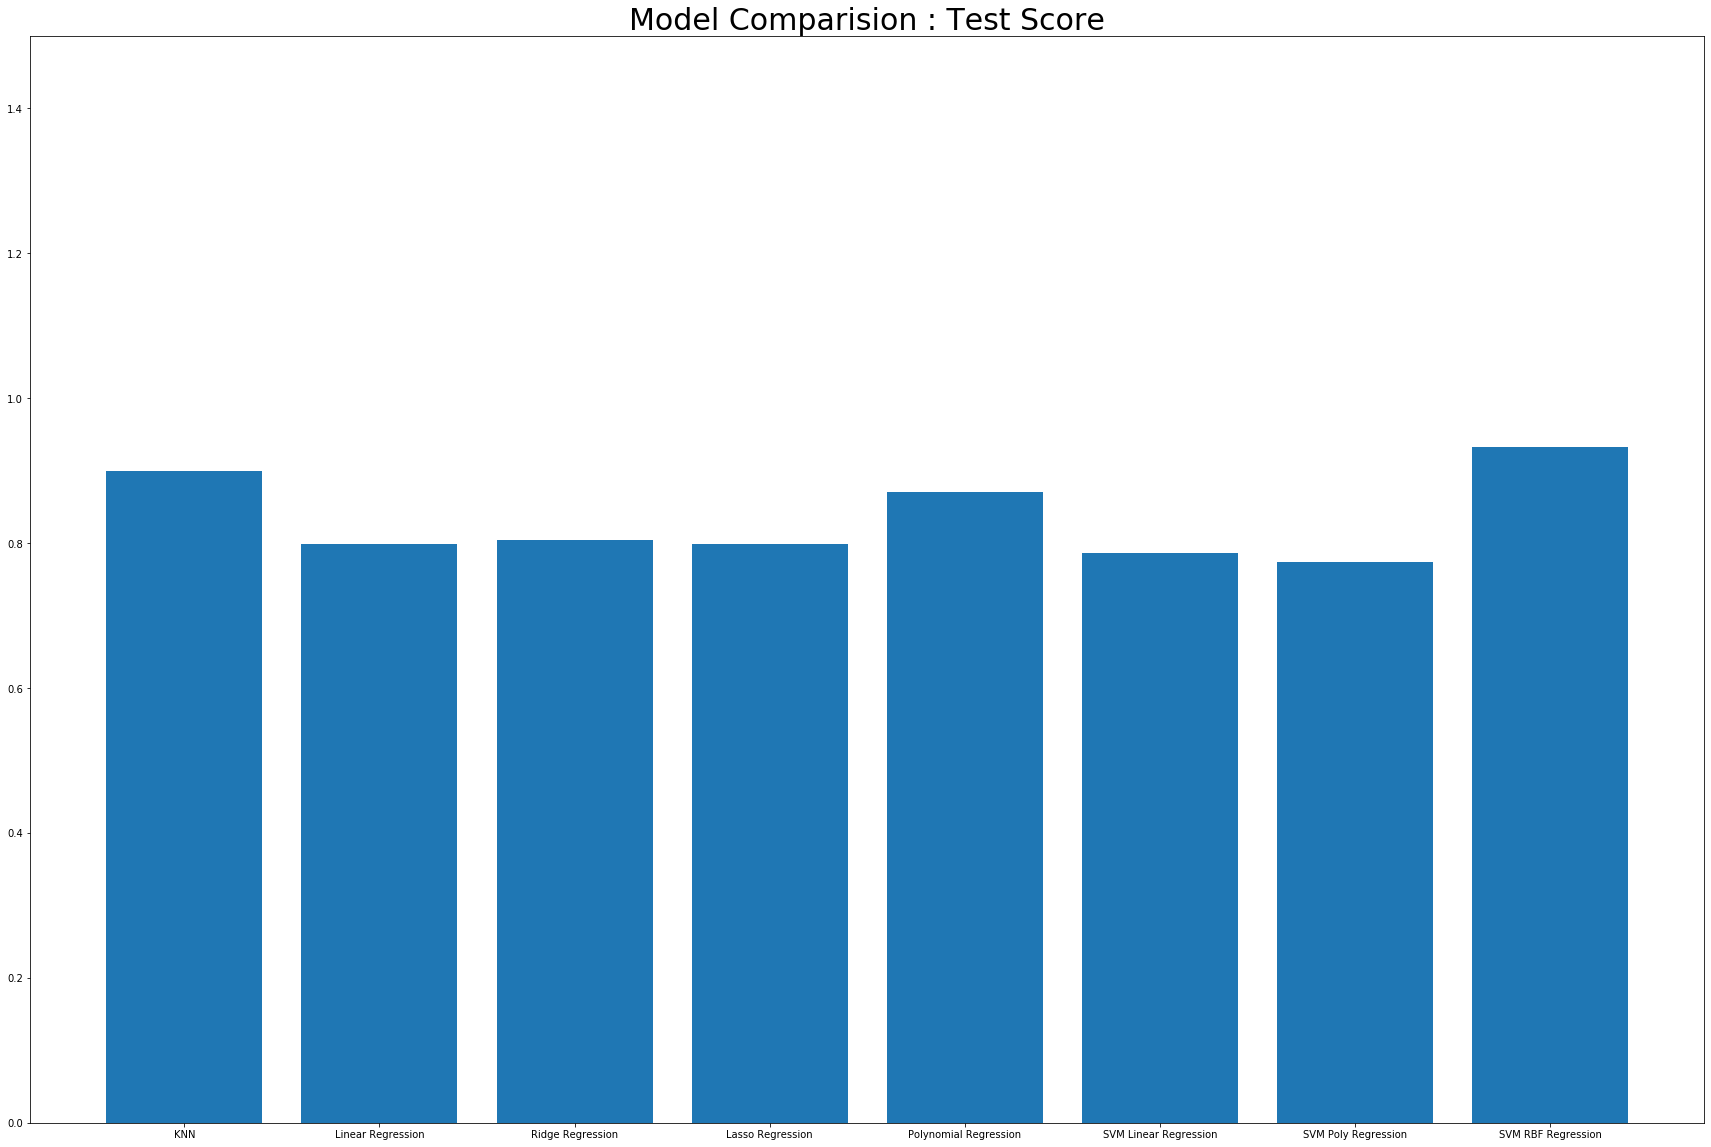

In [128]:
plt.figure(figsize=(30,20))
plt.ylim(0, 1.5)
plt.bar(classifier, test_score)
plt.title('Model Comparision : Test Score', fontsize =30)

# From the comparison results, KNN Regressor has the best cross validation score, train & test scores and the least Mean Absolute error. So we will be selecting KNN Regressor with n_neighbors =4 as our best model.

# Training the best model on the entire dataset and predicting the target values

In [129]:
knn = KNeighborsRegressor(n_neighbors=4)

In [130]:
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                    weights='uniform')

In [131]:
knn.predict(x_test_scaled)[0:5]

array([73.4  , 65.925, 61.175, 78.475, 66.9  ])

In [132]:
reg = SVR(kernel = 'rbf',C=100)
parameters = {'gamma': [0.5,1.0,0.1]}
clf = GridSearchCV(reg, parameters, cv=5, return_train_score=True)
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=100, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [0.5, 1.0, 0.1]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True, scoring=None, verbose=0)

In [133]:
clf.predict(x_test_scaled)[0:5]

array([73.87380415, 65.68082805, 62.81109214, 77.07204622, 68.37281681])